In [43]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

훈련 결과 파일을 불러오자.

In [16]:
with open('result.json','r') as f:
    d = json.load(f)

print(d.keys())

dict_keys(['space', 'character', 'khaiii', 'mecab', 'okt', 'komoran', 'bert', 'kobert', 'koelectra'])


각 토크나이저별 데이터는 다음과 같이 이루어져 있다.

* loss : 에폭별 손실
* acc : 에폭별 정확도
* training time : 에폭별 훈련시간
* data loading time : 토큰화하는데 걸린 시간
* num. vocabs : 최종 생성된 토큰수 (최대 30,002개)

In [18]:
d['space']

{'loss': [0.506,
  0.462,
  0.443,
  0.439,
  0.433,
  0.428,
  0.436,
  0.439,
  0.439,
  0.448],
 'acc': [0.733, 0.766, 0.776, 0.784, 0.788, 0.791, 0.792, 0.793, 0.792, 0.791],
 'training time': [17.383,
  17.337,
  17.396,
  17.432,
  17.424,
  17.472,
  17.48,
  17.471,
  17.444,
  17.499],
 'data loading time': 1.706,
 'num. vocabs': 30002}

평균 훈련 시간 컬럼 생성

In [19]:
for k in d.keys():
    d[k]['training_time_avg'] = sum(d[k]['training time'])/len(d[k]['training time'])

손실과 정확도만 따로 저장하자.

In [20]:
loss = {k:d[k]['loss'] for k in d.keys()}
acc = {k:d[k]['acc'] for k in d.keys()}

kobert는 HuggingFace에 올라온 모델의 성능이 영 좋지 않아서 삭제하자.

In [44]:
df_loss = pd.DataFrame.from_dict(loss)
df_loss = df_loss.drop('kobert', axis=1)
df_loss.index = range(1,11)
df_loss

,space,character,khaiii,mecab,okt,komoran,bert,koelectra
1,0.506,0.401,0.390,0.365,0.408,0.380,0.425,0.398
2,0.462,0.355,0.351,0.339,0.363,0.348,0.401,0.355
3,0.443,0.343,0.331,0.319,0.343,0.341,0.381,0.343
4,0.439,0.324,0.334,0.313,0.339,0.322,0.374,0.333
5,0.433,0.318,0.324,0.304,0.323,0.323,0.359,0.331
6,0.428,0.316,0.321,0.307,0.330,0.313,0.359,0.324
7,0.436,0.325,0.322,0.317,0.331,0.332,0.371,0.331
8,0.439,0.312,0.322,0.308,0.338,0.319,0.366,0.329
9,0.439,0.322,0.316,0.308,0.340,0.321,0.357,0.320
10,0.448,0.318,0.328,0.315,0.346,0.325,0.352,0.338


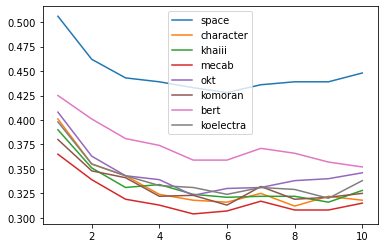

In [45]:
df_loss.plot()

In [46]:
df_acc = pd.DataFrame.from_dict(acc)
df_acc = df_acc.drop('kobert', axis=1)
df_acc.index = range(1,11)
df_acc

,space,character,khaiii,mecab,okt,komoran,bert,koelectra
1,0.733,0.823,0.820,0.836,0.813,0.830,0.802,0.819
2,0.766,0.845,0.844,0.853,0.839,0.849,0.819,0.844
3,0.776,0.852,0.853,0.862,0.849,0.852,0.833,0.851
4,0.784,0.861,0.859,0.868,0.855,0.864,0.838,0.857
5,0.788,0.864,0.863,0.872,0.859,0.865,0.844,0.859
6,0.791,0.866,0.867,0.875,0.861,0.868,0.845,0.862
7,0.792,0.868,0.867,0.876,0.864,0.869,0.847,0.864
8,0.793,0.870,0.868,0.877,0.865,0.871,0.849,0.864
9,0.792,0.868,0.868,0.874,0.865,0.870,0.850,0.866
10,0.791,0.872,0.870,0.877,0.867,0.868,0.852,0.866


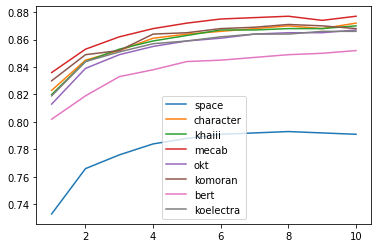

In [47]:
df_acc.plot()

이번엔 모델별 토크나이징 시간 및 훈련 시간을 비교해보자.

In [48]:
d_time = {k: {'training_time_avg':d[k]['training_time_avg'],
              'tokenizing_time':d[k]['data loading time'],
              'num. vocabs':d[k]['num. vocabs']
             } for k in d.keys()}

In [49]:
df_time = pd.DataFrame.from_dict(d_time)
df_time

,space,character,khaiii,mecab,okt,komoran,bert,kobert,koelectra
training_time_avg,17.4338,52.1952,33.734,31.5963,26.2123,32.615,37.6294,18.7762,33.7899
tokenizing_time,1.7060,2.1910,123.492,9.2020,265.3030,98.398,18.7480,18.3730,18.1900
num. vocabs,30002.0000,3006.0000,30002.000,30002.0000,30002.0000,30002.000,6850.0000,2018.0000,21670.0000


훈련 시간은 의외로 음절 단위로 끊었을 때 오래 걸리는 편이며, 띄어쓰기가 가장 빠른 편.

<BarContainer object of 9 artists>

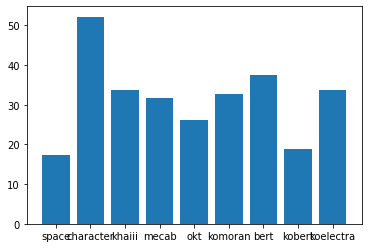

In [50]:
plt.bar(df_time.columns, df_time.iloc[0])

토크나이징 시간은 공백/음절 단위가 가장 빠르며, 일부 한글 토크나이저들의 성능이 매우 떨어지는 편이다.

<BarContainer object of 9 artists>

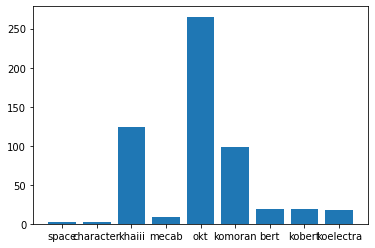

In [51]:
plt.bar(df_time.columns, df_time.iloc[1])

단어의 갯수는 음절 단위 및 bert가 압도적으로 적은 편이며, 나머지는 대부분 최대치인 30,000개를 기록했다.

<BarContainer object of 9 artists>

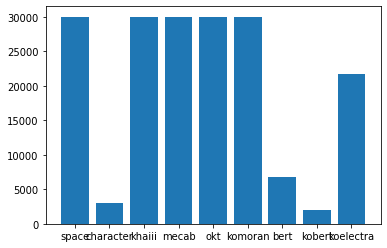

In [52]:
plt.bar(df_time.columns, df_time.iloc[2])

## 성능

은전한닢으로 대동단결하자... 그리고 띄어쓰기 토크나이저는 영 못쓸 정도이지만, 음절 단위 토크나이저는 성능이나 토크나이징 시간에서 생각보다 꽤 괜찮은 편이다. 다만 훈련 시간이 오래 걸리는 단점이 있다.